In [687]:
import pandas as pd
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

path = 'E:\\ML COURSE VNIT\\A2\\Matlab_accidents.mat'
mat = scipy.io.loadmat(path)
data = mat['accidents']

In [689]:
states = data[0][0][1] # State names
num_data = data[0][0][2] # Numerical data
columns = data[0][0][3][0] # Column Names

In [690]:
cols = [] # Column Names
for i in range(0,len(columns)):
    cols.append(columns[i][0])

In [691]:
data_val = data[0][0][2]
df_dict = {}
for i in range(0,len(cols)):
    val = []
    for j in range(0,len(num_data)):
        val.append(num_data[j][i])
    df_dict[cols[i]] = val

In [692]:
df = pd.DataFrame(df_dict)
df.insert(0, 'State', states)

In [693]:
df

,State,Census ID,Centroid Longitude,Centroid Latitude,Traffic fatalities,Licensed drivers (thousands),Registered vehicles (thousands),Vehicle-miles traveled (millions),Miles traveled per vehicle,Fatalities per 100K licensed drivers,Fatalities per 100K registered vehicles,Fatalities per 100M vehicle-miles traveled,Fatalities involving high blood alcohol,Percent Alcohol-Related,Total Population,Urban Population,Rural Population,Pct Urban Population
0,[Wyoming],56.0,-107.555625,43.032664,164.0,380.180,671.529,9261.0,13790.915954,43.137461,24.421879,1.770867,54.0,32.926829,493782.0,322073.0,171709.0,65.225747
1,[District of Columbia],11.0,-77.026928,38.892064,43.0,349.122,240.403,3742.0,15565.529548,12.316611,17.886632,1.149118,12.0,27.906977,572059.0,572059.0,0.0,100.000000
2,[Vermont],50.0,-72.556496,44.043498,98.0,550.462,551.516,7855.0,14242.560506,17.803227,17.769203,1.247613,20.0,20.408163,608827.0,232550.0,376277.0,38.196401
3,[Alaska],2.0,-152.459342,64.609656,101.0,482.532,681.115,4990.0,7326.222444,20.931254,14.828627,2.024048,30.0,29.702970,626932.0,411955.0,214977.0,65.709678
4,[North Dakota],38.0,-99.499793,47.469117,100.0,461.780,721.835,7594.0,10520.409789,21.655334,13.853581,1.316829,35.0,35.000000,642200.0,358394.0,283806.0,55.807225
5,[South Dakota],46.0,-99.678970,44.272030,197.0,563.298,882.769,8784.0,9950.508004,34.972608,22.316144,2.242714,76.0,38.578680,754844.0,391936.0,362908.0,51.922781
6,[Delaware],10.0,-75.494156,39.107074,134.0,533.943,728.524,9301.0,12766.909532,25.096312,18.393354,1.440705,48.0,35.820896,783600.0,627045.0,156555.0,80.021057
7,[Montana],30.0,-110.576261,46.867085,229.0,712.880,1056.668,11207.0,10605.980308,32.123218,21.671897,2.043366,100.0,43.668122,902195.0,487465.0,414730.0,54.031002
8,[Rhode Island],44.0,-71.433651,41.588663,83.0,741.841,834.501,8473.0,10153.373094,11.188381,9.946064,0.979582,41.0,49.397590,1048319.0,953295.0,95024.0,90.935584
9,[Hawaii],15.0,-154.525892,21.045779,142.0,843.876,970.518,9725.0,10020.422084,16.827117,14.631362,1.460154,52.0,36.619718,1211537.0,1109179.0,102358.0,91.551393


In [694]:
path_store = 'E:\\ML COURSE VNIT\\A2\\us_acc.csv'
df.to_csv(path_store,index=False)

In [695]:
ratio = 0.75

In [696]:
def BT9ECE065_dataset_div_shuffle(path,ratio): # The function created to split the data
    
    '''
    Here, we will check the extension of the dataset. If it's .mat file, 
    then, we process it in different way
    '''
    str_len = len(path)
    ext_of_path = path[str_len-4:str_len]
    
    if ext_of_path == '.mat':
        
        # Loading the .mat file using scipy library (returns in a dictionary format)
        mat = scipy.io.loadmat(path)
        
        
        list_of_data = []
        for i in mat.keys():
            ''' Here, we will store data whose keys are not identifiers 
                i.e, key name doesn't start with an "underscore" (like __val__)'''
            if i[0]!="_":
                list_of_data.append(mat[i])
                
        ''' Now, we convert first component of list to dataframe and 
            next, we will append other elements of dictionary to this dataframe.
            Since, in .mat file, the data and labels are stored in dictionary format
            (with seperate keys), we take all of them in a combined dataframe.
            '''
        df = pd.DataFrame(list_of_data[0])
        for i in range(1,len(list_of_data)):
            val = pd.DataFrame(list_of_data[i])
            for j in range(0,len(list_of_data[i][0])):
                str_val = 'val_'+str(i)+'_'+str(j)
#                 print("lol:",val[j])
                df[str_val] = pd.DataFrame(val[j])
                
        # df is our required dataframe
    
    else:
        # Reading the dataset if it's ".csv or .xls" format 
        df = pd.read_csv(path)
    
    '''
    Using sample() function in pandas to split the dataset into train and test sets.
    "frac = ratio" splits that much ratio of data into train_set.
    The sample() function also shuffles the dataset.
    '''
    train_set = df.sample(frac=ratio,random_state=1,replace = True)
    
    
    '''
    To get testset, Drop the rows that are in train_set from entire dataframe
    and store the leftover rows. This is our test_set
    '''
    test_set = df.drop(train_set.index)
    
    return train_set,test_set

In [697]:
TrainSet,TestSet = BT9ECE065_dataset_div_shuffle(path_store,ratio)
TrainSet = shuffle(TrainSet)

In [698]:
train_x = TrainSet['Registered vehicles (thousands)']
train_y = TrainSet['Fatalities per 100K registered vehicles']

In [699]:
# Y = theta*W 
theta = np.ones((len(train_x),2),dtype=np.long)
theta[:,0] = train_x

Y = np.zeros((len(train_y),1),dtype = np.uint8)
Y[:,0] = train_y
W = np.zeros((2,1)) 

In [700]:
W = np.matmul(np.matmul(np.linalg.inv(np.matmul(theta.T, theta)),theta.T),Y)

In [701]:
m = W[0]
c = W[1]

In [702]:
Y_hat = m*theta[:,0] + c

In [703]:
Y_hat

array([19.85161385, 20.62653177, 18.72563104, 18.57874086, 18.61447801,
       18.65021515, 18.59135397, 18.77450684, 18.53590885, 18.70802524,
       18.42265363, 18.72563104, 18.6370765 , 21.01701262, 18.55088691,
       19.23120651, 26.77515995, 18.88276936, 19.85161385, 18.87488617,
       18.88276936, 18.65021515, 20.03450394, 19.56519115, 19.36390694,
       18.73141204, 26.77515995, 18.5490475 , 19.16840374, 19.16840374,
       20.46466353, 22.87744629, 19.61616913, 19.46113299, 19.17576139,
       18.81076953, 20.46466353, 18.61447801])

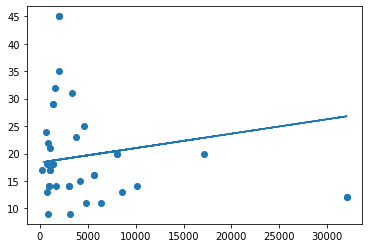

In [704]:
plt.scatter(theta[:,0],Y)
plt.plot(theta[:,0],Y_hat,"--")
plt.show()

In [705]:
# Testing
test_x = TestSet['Traffic fatalities']
test_y = TestSet['Fatalities involving high blood alcohol']

In [706]:
# Y = theta*W 
theta_test = np.ones((len(test_x),2),dtype=np.long)
theta_test[:,0] = test_x

Y_test = np.zeros((len(test_y),1),dtype = np.uint8)
Y_test[:,0] = test_y

In [707]:
Y_hat_test = m*theta_test[:,0] + c

In [708]:
error = np.square(np.subtract(Y_test[0],Y_hat_test[0])).mean()

In [709]:
error

2.60712740382605

In [723]:
# USING GRADIENT DESCENT
L = 1e-10
epochs = 5000
n = len(theta[:,0])
n

38

In [724]:
import random

In [725]:
m,c = random.random(),random.random()

In [726]:
m,c

(0.777503793195551, 0.38977083969506066)

In [727]:
for i in range(epochs): 
    Y_hat = m*theta[:,0] + c  # The current predicted value of Y
    l = np.matmul(theta[:,0],(Y - Y_hat))
    D_m = (-2/n) * np.sum(l)  # Derivative wrt m
    D_c = (-2/n) * np.sum(Y - Y_hat)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print (m, c)

0.003243615864372899 0.3897373330174762


In [733]:
Y_hat_test_g = m*theta_test[:,0] + c

In [734]:
error = np.square(np.subtract(Y_test[0],Y_hat_test_g[0])).mean()

In [735]:
error

372.1962467915656

In [738]:
# Using another relationship between input and output

'''
parameters are Total Population, Licensed drivers, Registered Vehicles and Let's predict Traffic fatalities
'''

"\nparameters are Total Population, Licensed drivers, Registered Vehicles and Let's predict Traffic fatalities\n"

In [739]:
TrainSet

,State,Census ID,Centroid Longitude,Centroid Latitude,Traffic fatalities,Licensed drivers (thousands),Registered vehicles (thousands),Vehicle-miles traveled (millions),Miles traveled per vehicle,Fatalities per 100K licensed drivers,Fatalities per 100K registered vehicles,Fatalities per 100M vehicle-miles traveled,Fatalities involving high blood alcohol,Percent Alcohol-Related,Total Population,Urban Population,Rural Population,Pct Urban Population
37,['Indiana'],18.0,-86.577065,39.448159,947.0,4521.329,5678.318,72713.0,12805.376522,20.945169,16.677474,1.302381,254.0,26.821542,6080485.0,4303180.0,1777305.0,70.770342
43,['Michigan'],26.0,-85.908551,45.199633,1159.0,7103.404,8627.477,103326.0,11976.386608,16.316121,13.433823,1.121693,367.0,31.665229,9938444.0,7419524.0,2518920.0,74.654785
12,['Idaho'],16.0,-114.619934,45.010490,260.0,942.983,1393.702,14729.0,10568.256342,27.572077,18.655351,1.765225,81.0,31.153846,1293953.0,859104.0,434849.0,66.393756
8,['Rhode Island'],44.0,-71.433651,41.588663,83.0,741.841,834.501,8473.0,10153.373094,11.188381,9.946064,0.979582,41.0,49.397590,1048319.0,953295.0,95024.0,90.935584
9,['Hawaii'],15.0,-154.525892,21.045779,142.0,843.876,970.518,9725.0,10020.422084,16.827117,14.631362,1.460154,52.0,36.619718,1211537.0,1109179.0,102358.0,91.551393
11,['Maine'],23.0,-69.081113,44.885791,194.0,984.829,1106.776,14948.0,13505.894598,19.698851,17.528389,1.297832,58.0,29.896907,1274923.0,512592.0,762331.0,40.205722
5,['South Dakota'],46.0,-99.678970,44.272030,197.0,563.298,882.769,8784.0,9950.508004,34.972608,22.316144,2.242714,76.0,38.578680,754844.0,391936.0,362908.0,51.922781
15,['New Mexico'],35.0,-106.175514,34.291490,521.0,1271.365,1579.258,23942.0,15160.284133,40.979577,32.990176,2.176092,185.0,35.508637,1819046.0,1364835.0,454211.0,75.030263
0,['Wyoming'],56.0,-107.555625,43.032664,164.0,380.180,671.529,9261.0,13790.915954,43.137461,24.421879,1.770867,54.0,32.926829,493782.0,322073.0,171709.0,65.225747
16,['Nevada'],32.0,-116.399879,39.176530,395.0,1548.097,1326.247,19354.0,14593.058457,25.515197,29.783291,2.040922,133.0,33.670886,1998257.0,1829781.0,168476.0,91.568852


In [740]:
train_x1 = TrainSet['Total Population']
train_x2 = TrainSet['Licensed drivers (thousands)']
train_x3 = TrainSet['Registered vehicles (thousands)']
train_y1 = TrainSet['Traffic fatalities']

In [747]:
# Y = theta*W 
theta_val = np.ones((len(train_x1),4),dtype=np.long)
theta_val[:,0] = train_x1
theta_val[:,1] = train_x2
theta_val[:,2] = train_x3

Y_val = np.zeros((len(train_y1),1),dtype = np.uint8)
Y_val[:,0] = train_y1
W_opt= np.zeros((4,1)) 

In [749]:
W_opt = np.matmul(np.matmul(np.linalg.inv(np.matmul(theta_val.T, theta_val)),theta_val.T),Y_val)

In [751]:
Y_hat_val = W_opt[0]*train_x1 + W_opt[1]*train_x2 + W_opt[2]*train_x3 + W_opt[3]

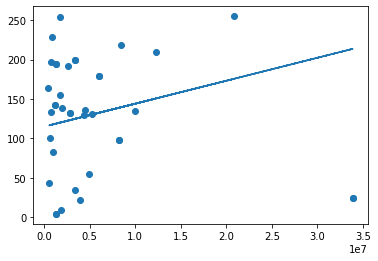

In [756]:
plt.scatter(theta_val[:,0],Y_val)
plt.plot(theta_val[:,0],Y_hat_val,"--")
plt.show()

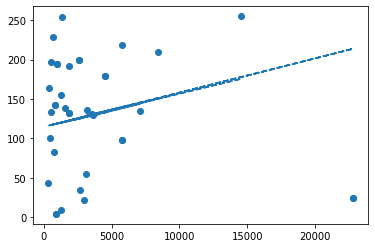

In [757]:
plt.scatter(theta_val[:,1],Y_val)
plt.plot(theta_val[:,1],Y_hat_val,"--")
plt.show()

In [762]:
test_x1 = TestSet['Total Population']
test_x2 = TestSet['Licensed drivers (thousands)']
test_x3 = TestSet['Registered vehicles (thousands)']
test_y1 = TestSet['Traffic fatalities']

In [768]:
# Y = theta*W 
theta_val_test = np.ones((len(test_x1),4),dtype=np.long)
theta_val_test[:,0] = test_x1
theta_val_test[:,1] = test_x2
theta_val_test[:,2] = test_x3

Y_val_test = np.zeros((len(test_y1),1),dtype = np.uint8)
Y_val_test[:,0] = test_y1

In [769]:
Y_hat_val_test = W_opt[0]*test_x1 + W_opt[1]*test_x2 + W_opt[2]*test_x3 + W_opt[3]

In [770]:
error = np.square(np.subtract(Y_val_test[0],Y_hat_val_test)).mean()

In [771]:
error

1401.7872704424456